In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from tqdm import tqdm
from scipy.optimize import curve_fit

In [2]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
def rn(phi):
    return np.cos(phi)*sigmax()+np.sin(phi)*sigmay()

r_ls = np.linspace(1., 1.5, 101)
res1, res2 = [], []
for r in r_ls:
    Had = ry(-np.pi/2*r)*rx(np.pi*r)

    beta = np.arccos(27/32)
    theta = np.arctan(1/2)
#     phi1 = 3*np.pi/2-theta-beta/2
#     phi2 = np.pi/2+beta/2-theta
    phi1 = -(-np.pi/2-theta-beta/2)
    phi2 = -(np.pi/2+beta/2-theta)
    Had_sk1 = rotation(rn(phi2),2*np.pi*r)*rotation(rn(phi1), 2*np.pi*r)*ry(-np.pi/2*r)*rx(np.pi*r)
    
    state1 = Had*Had*basis(2,1)
    state2 = Had_sk1*Had_sk1*basis(2,1)
    res1.append(np.real(basis(2,0).dag()*ket2dm(state1)*basis(2,0))[0][0])
    res2.append(np.real(basis(2,0).dag()*ket2dm(state2)*basis(2,0))[0][0])

/Users/sunke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  import sys
/Users/sunke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  from ipykernel import kernelapp as app


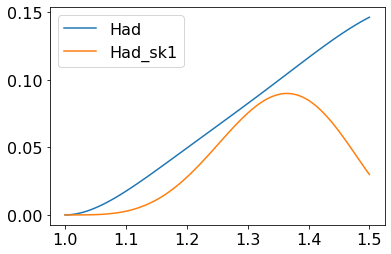

In [4]:
plt.plot(r_ls, res1, label = 'Had')
plt.plot(r_ls, res2, label = 'Had_sk1')
plt.legend()

In [64]:
import pandas as pd
df = pd.read_excel('data231218.xlsx')
df

,r,filename_Had,filename_Had_sk1
0,1.0,Kick_phse_cal_sq_003,Kick_phse_cal_sq_014
1,1.1,Kick_phse_cal_sq_004,Kick_phse_cal_sq_013
2,1.2,Kick_phse_cal_sq_005,Kick_phse_cal_sq_012
3,1.3,Kick_phse_cal_sq_006,Kick_phse_cal_sq_011
4,1.4,Kick_phse_cal_sq_007,Kick_phse_cal_sq_010
5,1.5,Kick_phse_cal_sq_008,Kick_phse_cal_sq_009


In [65]:
def readFile(filename):
    timeTickFirst, timeTickLast, x, ion3, ion3_raw, ion3_bottom, ion3_top, ion4, ion4_raw, ion4_bottom, \
    ion4_top, ion5, ion5_raw, ion5_bottom, ion5_top, ion2, ion2_raw, ion2_bottom, ion2_top, ion6, ion6_raw, \
    ion6_bottom, ion6_top\
      = np.loadtxt(filename, comments='#', delimiter='\t', converters=None, 
                   skiprows=0,unpack=True, encoding='latin1')
    return x, ion4

(-0.05, 1.05)

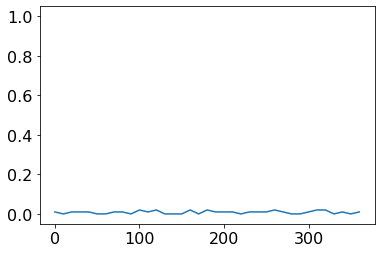

In [66]:
time, prob = readFile(df['filename_Had'][0])
plt.plot(time, prob)
plt.ylim([-0.05, 1.05])

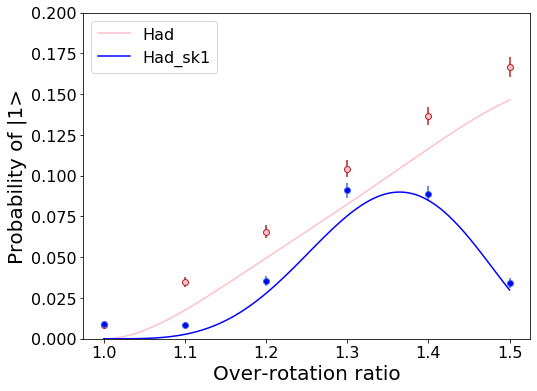

In [75]:
avg1, avg2 = [], []
std1, std2 = [], []
for i in range(len(df)):
    time1, prob1 = readFile(df['filename_Had'][i])
    time2, prob2 = readFile(df['filename_Had_sk1'][i])
    y1 = np.mean(prob1)
    y2 = np.mean(prob2)
    avg1.append(y1)
    avg2.append(y2)
    std1.append(np.sqrt(y1*(1-y1)/100/len(time1)))
    std2.append(np.sqrt(y2*(1-y2)/100/len(time2)))
xdata = df['r']

plt.figure(figsize = (8,6))
plt.errorbar(xdata, avg1, yerr=std1, ls='', marker='o',mec='firebrick', ecolor='firebrick',mfc='pink')
plt.errorbar(xdata, avg2, yerr=std2, ls='', marker='o',mec='royalblue', ecolor='royalblue',mfc='blue')
plt.plot(r_ls, res1, label = 'Had', color = 'pink')
plt.plot(r_ls, res2, label = 'Had_sk1', color = 'blue')
plt.xlabel('Over-rotation ratio')
plt.ylabel('Probability of |1>')
plt.ylim([0.0, 0.2])
plt.legend()

In [70]:
rotation(sigmax(), np.pi/2)

/Users/sunke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  """Entry point for launching an IPython kernel.


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0.70710678+0.j         0.        -0.70710678j]
 [0.        -0.70710678j 0.70710678+0.j        ]]

# Add light shift error

In [14]:
def rn_ls(phi, ls_ratio):
    return np.sqrt(1-ls_ratio**2)*(np.cos(phi)*sigmax()+np.sin(phi)*sigmay())+ls_ratio*sigmaz()

r_ls = np.linspace(1., 1.5, 101)
res1, res2 = [], []
ls_ratio = 1e-3
for r in r_ls:
#     Had = ry(-np.pi/2*r)*rx(np.pi*r)
    Had = rotation(rn_ls(3*np.pi/2, ls_ratio),np.pi/2*r) * rotation(rn_ls(0, ls_ratio),np.pi*r)

    beta = np.arccos(27/32)
    theta = np.arctan(1/2)
#     phi1 = 3*np.pi/2-theta-beta/2
#     phi2 = np.pi/2+beta/2-theta
    phi1 = -(-np.pi/2-theta-beta/2)
    phi2 = -(np.pi/2+beta/2-theta)
    Had_sk1 = rotation(rn_ls(phi2, ls_ratio),2*np.pi*r)*rotation(rn_ls(phi1, ls_ratio), 2*np.pi*r)*\
            rotation(rn_ls(3*np.pi/2, ls_ratio),np.pi/2*r) * rotation(rn_ls(0, ls_ratio),np.pi*r)
    
    state1 = Had*Had*basis(2,1)
    state2 = Had_sk1*Had_sk1*basis(2,1)
    res1.append(np.real(basis(2,0).dag()*ket2dm(state1)*basis(2,0))[0][0])
    res2.append(np.real(basis(2,0).dag()*ket2dm(state2)*basis(2,0))[0][0])

/Users/sunke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  if __name__ == '__main__':
/Users/sunke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit



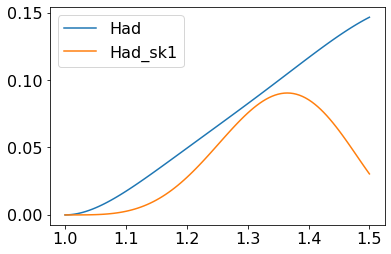

In [15]:
plt.plot(r_ls, res1, label = 'Had')
plt.plot(r_ls, res2, label = 'Had_sk1')
plt.legend()

## Scan the number of gates

In [191]:
def rn_ls(phi, ls_ratio):
    return np.sqrt(1-ls_ratio**2)*(np.cos(phi)*sigmax()+np.sin(phi)*sigmay())+ls_ratio*sigmaz()

r = 1.05
res1, res2 = [], []
ls_ratio = 0e-3

Had = rotation(rn_ls(3*np.pi/2, ls_ratio),np.pi/2*r) * rotation(rn_ls(0, ls_ratio),np.pi*r)

beta = np.arccos(27/32)
theta = np.arctan(1/2)
#     phi1 = 3*np.pi/2-theta-beta/2
#     phi2 = np.pi/2+beta/2-theta
phi1 = -(-np.pi/2-theta-beta/2)
phi2 = -(np.pi/2+beta/2-theta)
Had_sk1 = rotation(rn_ls(phi2, ls_ratio),2*np.pi*r)*rotation(rn_ls(phi1, ls_ratio), 2*np.pi*r)*\
        rotation(rn_ls(3*np.pi/2, ls_ratio),np.pi/2*r) * rotation(rn_ls(0, ls_ratio),np.pi*r)

state1 = basis(2,1)
state2 = basis(2,1)

steps = 30
n_steps = np.arange(0, steps, 1)
n_gates = np.arange(0, steps*2+2, 2)
res1.append(np.real(basis(2,0).dag()*ket2dm(state1)*basis(2,0))[0][0])
res2.append(np.real(basis(2,0).dag()*ket2dm(state2)*basis(2,0))[0][0])
for n in n_steps:    
    state1 = Had*Had*state1
    state2 = Had_sk1*Had_sk1*state2
    res1.append(np.real(basis(2,0).dag()*ket2dm(state1)*basis(2,0))[0][0])
    res2.append(np.real(basis(2,0).dag()*ket2dm(state2)*basis(2,0))[0][0])

/Users/sunke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  
/Users/sunke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit



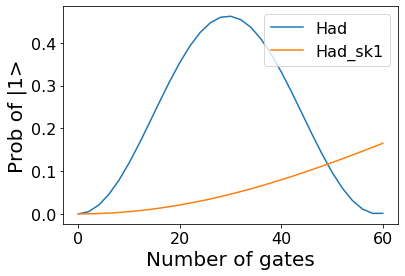

In [192]:
plt.plot(n_gates, res1, label = 'Had')
plt.plot(n_gates, res2, label = 'Had_sk1')
plt.xlabel('Number of gates')
plt.ylabel('Prob of |1>')
plt.legend()

In [197]:
def rn_ls(phi, ls_ratio):
    return np.sqrt(1-ls_ratio**2)*(np.cos(phi)*sigmax()+np.sin(phi)*sigmay())+ls_ratio*(qeye(2)-sigmaz())/2

r = 1.05
res1_ls, res2_ls = [], []
ls_ratio = 10e-3

Had = rotation(rn_ls(3*np.pi/2, ls_ratio),np.pi/2*r) * rotation(rn_ls(0, ls_ratio),np.pi*r)

beta = np.arccos(27/32)
theta = np.arctan(1/2)
#     phi1 = 3*np.pi/2-theta-beta/2
#     phi2 = np.pi/2+beta/2-theta
phi1 = -(-np.pi/2-theta-beta/2)
phi2 = -(np.pi/2+beta/2-theta)
Had_sk1 = rotation(rn_ls(phi2, ls_ratio),2*np.pi*r)*rotation(rn_ls(phi1, ls_ratio), 2*np.pi*r)*\
        rotation(rn_ls(3*np.pi/2, ls_ratio),np.pi/2*r) * rotation(rn_ls(0, ls_ratio),np.pi*r)

state1 = basis(2,1)
state2 = basis(2,1)

steps = 30
n_steps = np.arange(0, steps, 1)
n_gates = np.arange(0, steps*2+2, 2)
res1_ls.append(np.real(basis(2,0).dag()*ket2dm(state1)*basis(2,0))[0][0])
res2_ls.append(np.real(basis(2,0).dag()*ket2dm(state2)*basis(2,0))[0][0])
for n in n_steps:    
    state1 = Had*Had*state1
    state2 = Had_sk1*Had_sk1*state2
    res1_ls.append(np.real(basis(2,0).dag()*ket2dm(state1)*basis(2,0))[0][0])
    res2_ls.append(np.real(basis(2,0).dag()*ket2dm(state2)*basis(2,0))[0][0])

/Users/sunke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  
/Users/sunke/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit



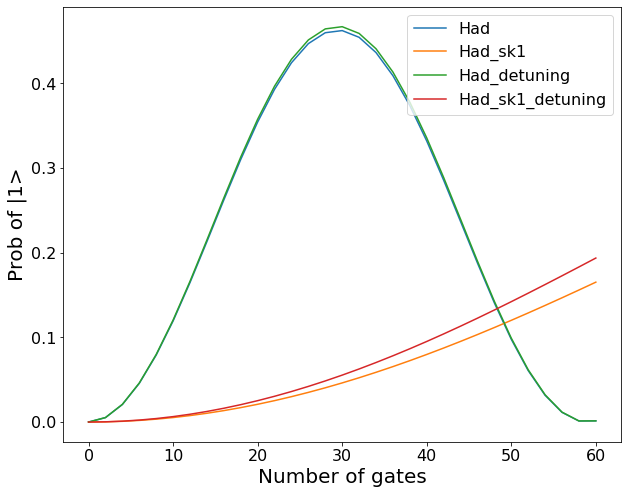

In [198]:
plt.figure(figsize = (10,8))
plt.plot(n_gates, res1, label = 'Had')
plt.plot(n_gates, res2, label = 'Had_sk1')
plt.plot(n_gates, res1_ls, label = 'Had_detuning')
plt.plot(n_gates, res2_ls, label = 'Had_sk1_detuning')
plt.xlabel('Number of gates')
plt.ylabel('Prob of |1>')
plt.legend()

## If using `mesolve`

In [199]:
qeye(2)-sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 2.]]

In [200]:
def Had_mesolve(is_sk1 = 0, init_state = basis(2,1), ls = 0e-3 * np.pi * 2):
    Omega = 1 * np.pi * 2
    Hx = Omega * sigmax() + ls * (qeye(2) - sigmaz())/2
    Hy = -Omega * sigmay() + ls * (qeye(2) - sigmaz())/2
    Hsk1_1 = Omega * rn(phi1) + ls * (qeye(2) - sigmaz())/2
    Hsk1_2 = Omega * rn(phi2) + ls * (qeye(2) - sigmaz())/2

    r = 1.05
    pi_time = np.pi/2 / Omega * r
    if is_sk1 == 0:
        time1 = np.linspace(0.0, pi_time, 2)
        result = mesolve(Hx, init_state, time1, [])
        time2 = np.linspace(0.0, pi_time/2, 2)
        result = mesolve(Hy, result.states[-1], time2, [])
    elif is_sk1 == 1:
        time1 = np.linspace(0.0, pi_time, 2)
        result = mesolve(Hx, init_state, time1, [])
        time2 = np.linspace(0.0, pi_time/2, 2)
        result = mesolve(Hy, result.states[-1], time2, [])
        time3 = np.linspace(0.0, 2*pi_time, 2)
        result = mesolve(Hsk1_1, result.states[-1], time3, [])
        time4 = np.linspace(0.0, 2*pi_time, 2)
        result = mesolve(Hsk1_2, result.states[-1], time4, [])
    final_state = result.states[-1]
    return final_state

In [201]:
steps = 30
n_steps = np.arange(0, steps, 1)
n_gates = np.arange(0, steps*2+2, 2)
state_had = basis(2,1)
state_sk1 = basis(2,1)
pop_had, pop_sk1 = [], []
pop_had.append(np.real(np.array(state_had.dag()*basis(2,0)*basis(2,0).dag()*state_had)[0][0]))
pop_sk1.append(np.real(np.array(state_sk1.dag()*basis(2,0)*basis(2,0).dag()*state_sk1)[0][0]))
for n in n_steps:
    init_state = basis(2,1)
    state_had = Had_mesolve(0, state_had)
    state_had = Had_mesolve(0, state_had)
    state_sk1 = Had_mesolve(1, state_sk1)
    state_sk1 = Had_mesolve(1, state_sk1)
    p_had = state_had.dag()*basis(2,0)*basis(2,0).dag()*state_had
    p_sk1 = state_sk1.dag()*basis(2,0)*basis(2,0).dag()*state_sk1
    pop_had.append(np.real(np.array(p_had)[0][0]))
    pop_sk1.append(np.real(np.array(p_sk1)[0][0]))

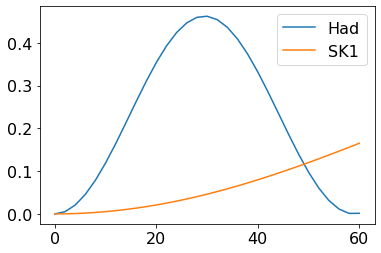

In [202]:
plt.plot(n_gates, pop_had, label = 'Had')
plt.plot(n_gates, pop_sk1, label = 'SK1')
plt.legend()

In [203]:
state_had = basis(2,1)
state_sk1 = basis(2,1)
pop_had_detuning, pop_sk1_detuning = [], []
pop_had_detuning.append(np.real(np.array(state_had.dag()*basis(2,0)*basis(2,0).dag()*state_had)[0][0]))
pop_sk1_detuning.append(np.real(np.array(state_sk1.dag()*basis(2,0)*basis(2,0).dag()*state_sk1)[0][0]))
ls = 10e-3 * np.pi * 2
for n in n_steps:
    init_state = basis(2,1)
    state_had = Had_mesolve(0, state_had, ls = ls)
    state_had = Had_mesolve(0, state_had, ls = ls)
    state_sk1 = Had_mesolve(1, state_sk1, ls = ls)
    state_sk1 = Had_mesolve(1, state_sk1, ls = ls)
    p_had = state_had.dag()*basis(2,0)*basis(2,0).dag()*state_had
    p_sk1 = state_sk1.dag()*basis(2,0)*basis(2,0).dag()*state_sk1
    pop_had_detuning.append(np.real(np.array(p_had)[0][0]))
    pop_sk1_detuning.append(np.real(np.array(p_sk1)[0][0]))

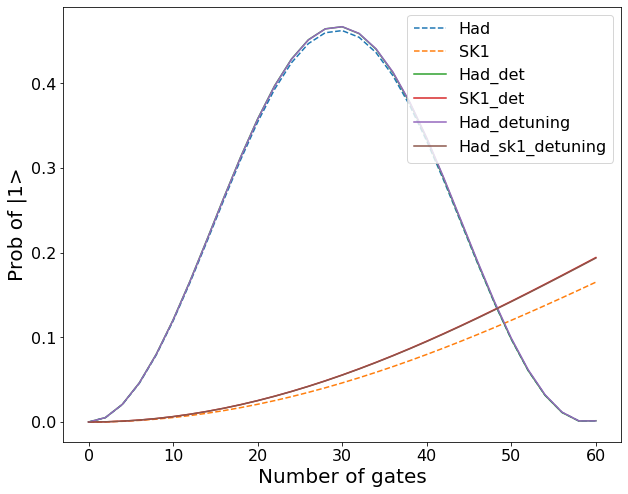

In [204]:
plt.figure(figsize = (10,8))
plt.plot(n_gates, pop_had, '--',label = 'Had')
plt.plot(n_gates, pop_sk1, '--',label = 'SK1')
plt.plot(n_gates, pop_had_detuning, label = 'Had_det')
plt.plot(n_gates, pop_sk1_detuning, label = 'SK1_det')
# plt.plot(n_gates, res1, label = 'Had')
# plt.plot(n_gates, res2, label = 'Had_sk1')
plt.plot(n_gates, res1_ls, label = 'Had_detuning')
plt.plot(n_gates, res2_ls, label = 'Had_sk1_detuning')
plt.xlabel('Number of gates')
plt.ylabel('Prob of |1>')
plt.legend()